In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans

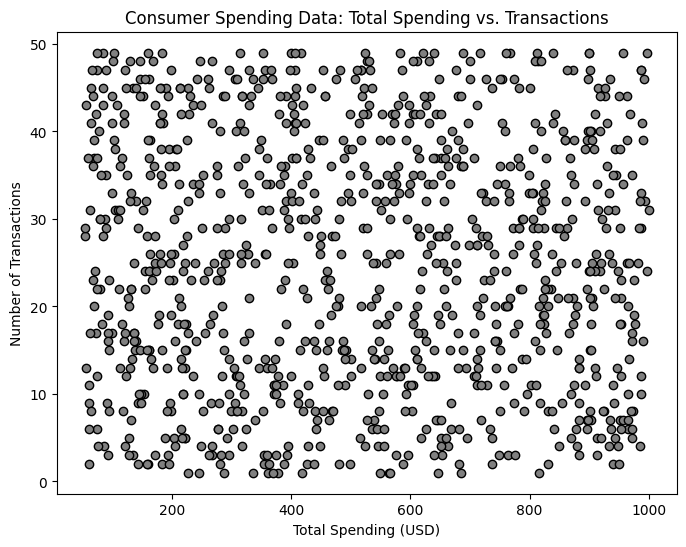

In [2]:
np.random.seed(42)

# Simulate data for 1000 customers:
#  - Total Spending (USD): Uniformly between $50 and $1000
#  - Number of Transactions: Random integer between 1 and 50
customer_spending = np.random.uniform(50, 1000, 1000)
num_transactions = np.random.randint(1, 50, 1000)
X = np.column_stack((customer_spending, num_transactions))

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolor='k')
plt.title("Consumer Spending Data: Total Spending vs. Transactions")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.show()

In [5]:
def compute_sse(data):
    if data.shape[0] == 0:
        return 0
    centroid = np.mean(data, axis=0)
    return np.sum((data - centroid) ** 2)

def bisecting_kmeans_visual(X, k, n_trials=5, sleep_time=2):
    # Start with one cluster containing all points
    clusters = [X]
    iteration = 0

    while len(clusters) < k:
        # Select the cluster with the highest Sum of Square Error (SSE) to split
        sse_list = [compute_sse(cluster) for cluster in clusters]
        idx_to_split = np.argmax(sse_list)
        cluster_to_split = clusters.pop(idx_to_split)

        best_sse = np.inf
        best_labels = None

        # Try several trials of KMeans (k=2) to find the best split
        for _ in range(n_trials):
            model = KMeans(n_clusters=2, random_state=np.random.randint(10000)).fit(cluster_to_split)
            sse_split = model.inertia_
            if sse_split < best_sse:
                best_sse = sse_split
                best_labels = model.labels_

        # Split the chosen cluster into two sub-clusters
        cluster1 = cluster_to_split[best_labels == 0]
        cluster2 = cluster_to_split[best_labels == 1]
        clusters.append(cluster1)
        clusters.append(cluster2)

        iteration += 1

        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
        plt.figure(figsize=(8,6))
        for idx, cluster in enumerate(clusters):
            plt.scatter(cluster[:, 0], cluster[:, 1],
                        c=colors[idx % len(colors)], edgecolor='k', label=f'Cluster {idx+1}')
            centroid = np.mean(cluster, axis=0)
            plt.scatter(centroid[0], centroid[1], c='red', marker='x', s=100)
        plt.title(f"Iteration {iteration}: Bisecting K-Means Clustering")
        plt.xlabel("Total Spending (USD)")
        plt.ylabel("Number of Transactions")
        plt.legend()
        plt.show()

        time.sleep(sleep_time)

    return clusters

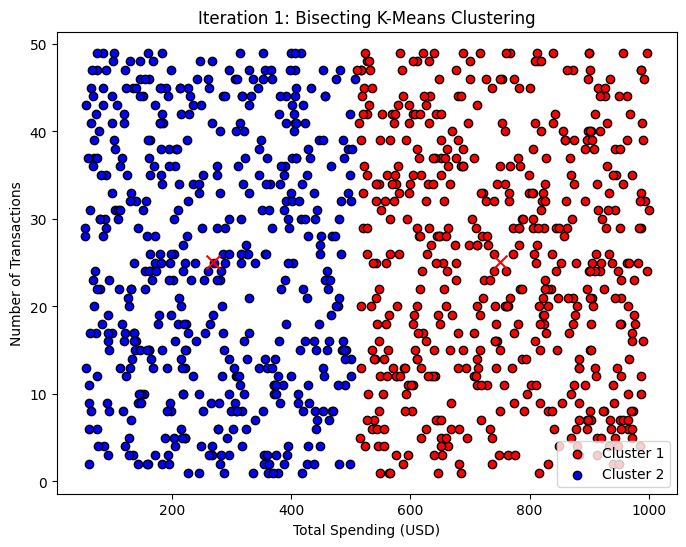

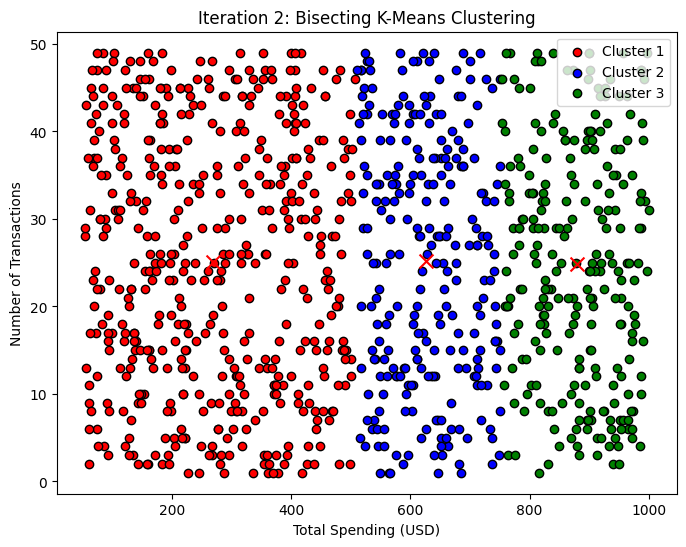

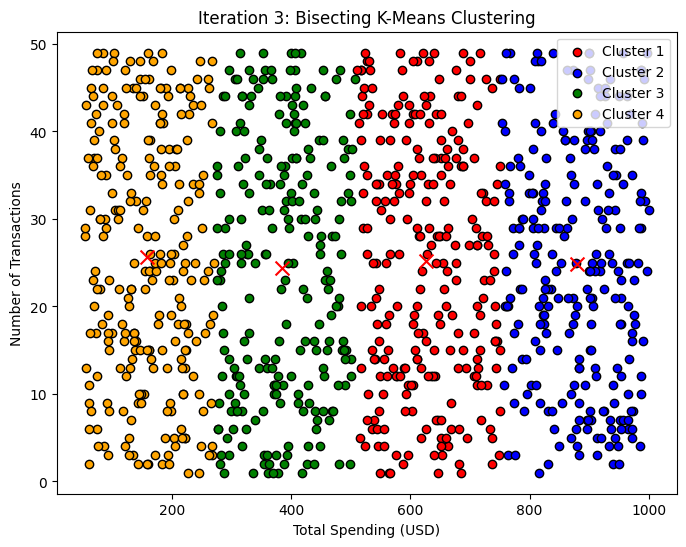

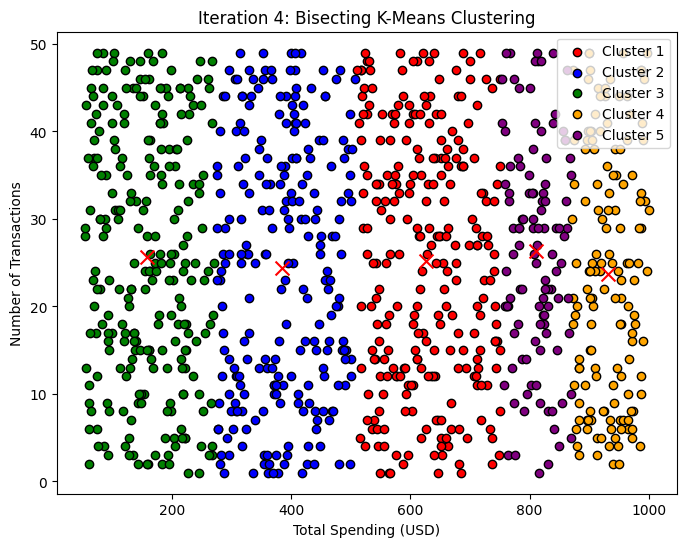

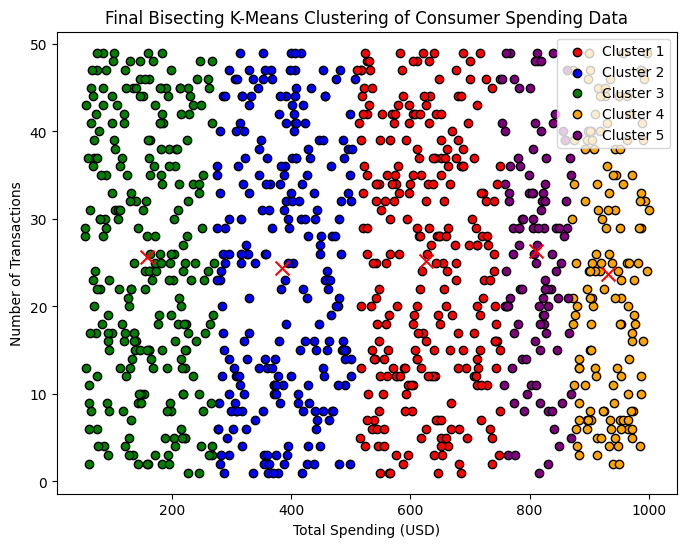

In [6]:
desired_clusters = 5
final_clusters = bisecting_kmeans_visual(X, desired_clusters, n_trials=5, sleep_time=2)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
plt.figure(figsize=(8,6))
for idx, cluster in enumerate(final_clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1],
                c=colors[idx % len(colors)], edgecolor='k', label=f'Cluster {idx+1}')
    centroid = np.mean(cluster, axis=0)
    plt.scatter(centroid[0], centroid[1], c='red', marker='x', s=100)
plt.title("Final Bisecting K-Means Clustering of Consumer Spending Data")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()